In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# For Linear Algebra and Neumerical analysis
import numpy as np 
# For Data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd 

# For ploting our data and results 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# For creating the neural network
import torch
from torch import nn, optim
import torch.functional as F

# For spliting the data into training and dev sets
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# For randomly shuffling the data
from sklearn.utils import shuffle

import os

# Our avialabe data files
print(os.listdir("../input"))

/kaggle/input/student-stress-factors-a-comprehensive-analysis/StressLevelDataset.csv
['student-stress-factors-a-comprehensive-analysis']


In [33]:
seed = 24

In [34]:
df = pd.read_csv("/kaggle/input/student-stress-factors-a-comprehensive-analysis/StressLevelDataset.csv")
df.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [35]:
df.dtypes

anxiety_level                   int64
self_esteem                     int64
mental_health_history           int64
depression                      int64
headache                        int64
blood_pressure                  int64
sleep_quality                   int64
breathing_problem               int64
noise_level                     int64
living_conditions               int64
safety                          int64
basic_needs                     int64
academic_performance            int64
study_load                      int64
teacher_student_relationship    int64
future_career_concerns          int64
social_support                  int64
peer_pressure                   int64
extracurricular_activities      int64
bullying                        int64
stress_level                    int64
dtype: object

In [36]:
df.describe()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,11.063636,17.777273,0.492727,12.555455,2.508182,2.181818,2.660000,2.753636,2.649091,2.518182,...,2.772727,2.772727,2.621818,2.648182,2.649091,1.881818,2.734545,2.767273,2.617273,0.996364
std,6.117558,8.944599,0.500175,7.727008,1.409356,0.833575,1.548383,1.400713,1.328127,1.119208,...,1.433761,1.414594,1.315781,1.384579,1.529375,1.047826,1.425265,1.417562,1.530958,0.821673
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,11.000000,0.000000,6.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
50%,11.000000,19.000000,0.000000,12.000000,3.000000,2.000000,2.500000,3.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.500000,3.000000,1.000000
75%,16.000000,26.000000,1.000000,19.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000
max,21.000000,30.000000,1.000000,27.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,2.000000


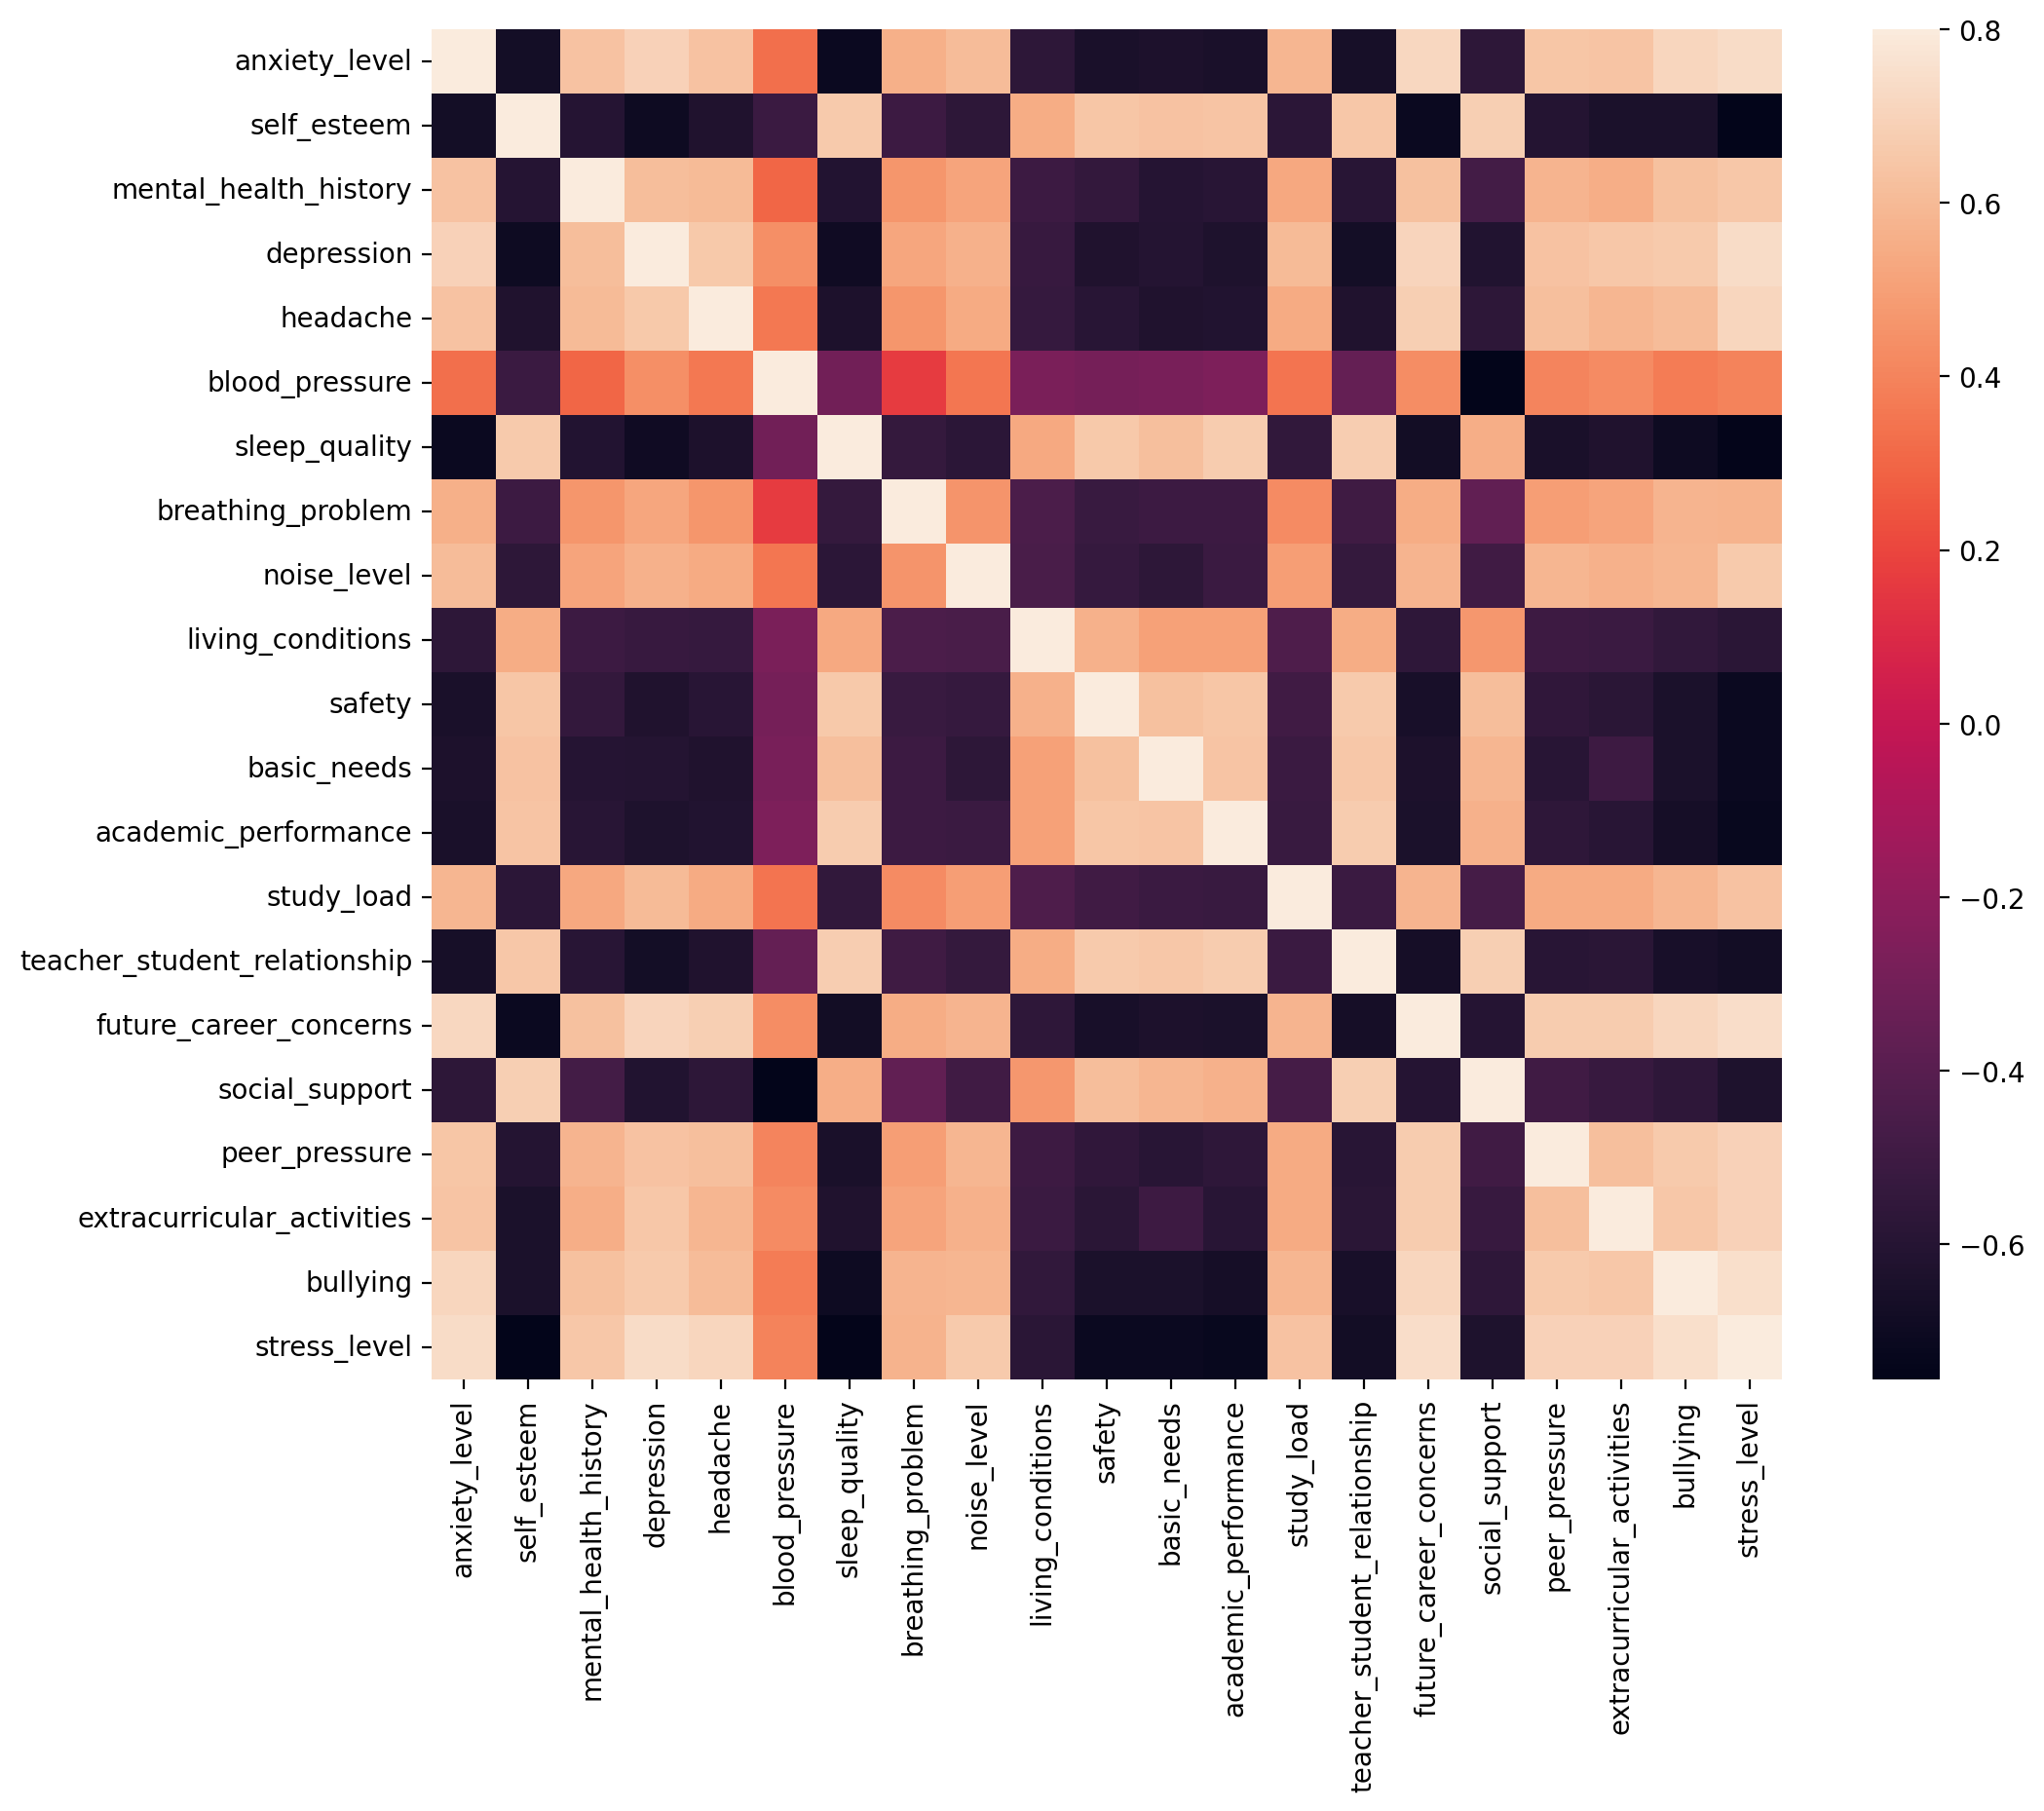

In [37]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

<Axes: >

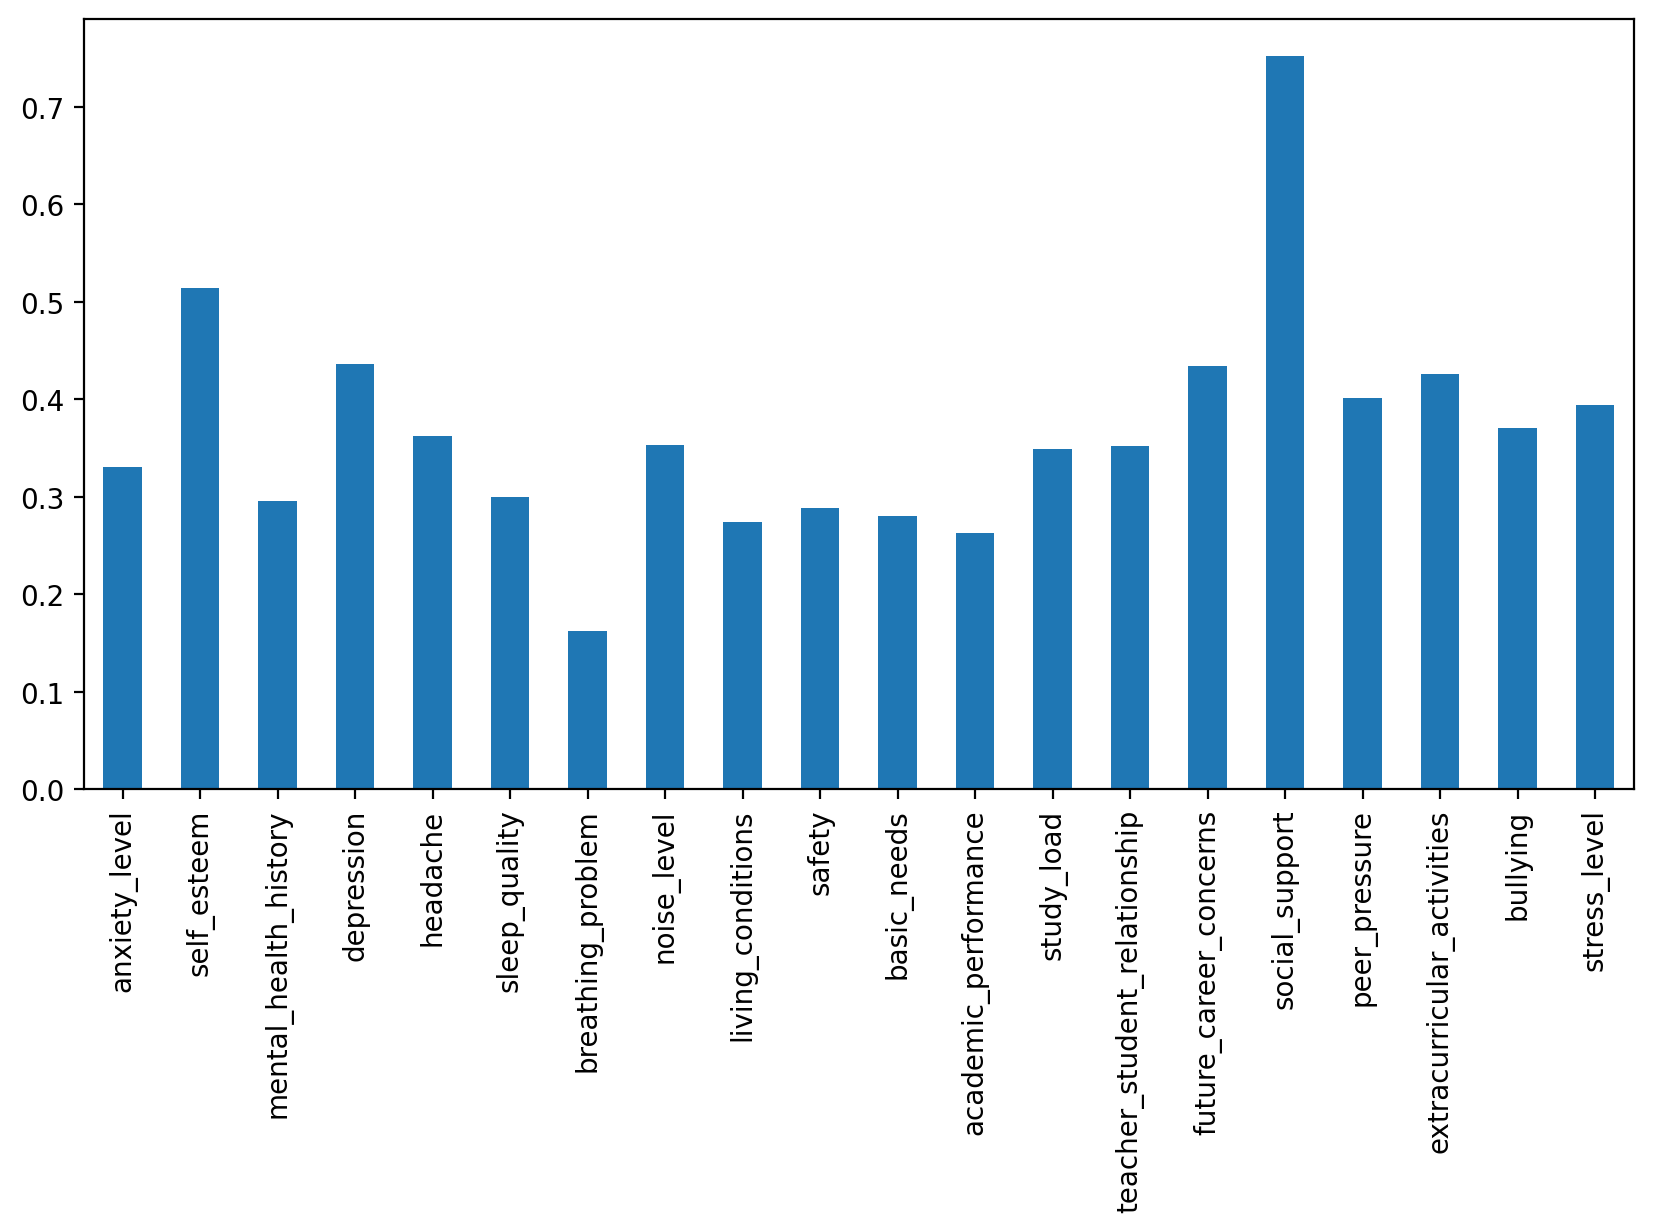

In [38]:
t = corrmat["blood_pressure"].drop("blood_pressure")

abs(t).plot(kind='bar',stacked=True, figsize=(10,5))

In [87]:
train, test = train_test_split(df, test_size=0.3, random_state=seed)
print(train.shape, test.shape)

(770, 21) (330, 21)


In [88]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=5, random_state=seed)


In [89]:
def divide_data(train, test, column="stress_level"):

    X_train = train.drop(column, axis=1)
    X_test  = test.drop(column, axis=1)
    
    y_train = train[column]
    y_test  = test[column]
    
    return X_train, y_train, X_test, y_test

In [90]:
df.columns

Index(['anxiety_level', 'self_esteem', 'mental_health_history', 'depression',
       'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem',
       'noise_level', 'living_conditions', 'safety', 'basic_needs',
       'academic_performance', 'study_load', 'teacher_student_relationship',
       'future_career_concerns', 'social_support', 'peer_pressure',
       'extracurricular_activities', 'bullying', 'stress_level'],
      dtype='object')

In [91]:
selected_columns = ["social_support", "teacher_student_relationship", "bullying", "sleep_quality", "depression", "stress_level"]

In [92]:
train[selected_columns].describe()

,social_support,teacher_student_relationship,bullying,sleep_quality,depression,stress_level
count,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000
mean,1.833766,2.590909,2.610390,2.627273,12.784416,1.009091
std,1.059186,1.384540,1.521035,1.533343,7.793183,0.819890
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,1.000000,1.000000,7.000000,0.000000
50%,2.000000,2.000000,3.000000,2.000000,12.000000,1.000000
75%,3.000000,4.000000,4.000000,4.000000,19.000000,2.000000
max,3.000000,5.000000,5.000000,5.000000,27.000000,2.000000


In [93]:
subset = train[selected_columns].copy()

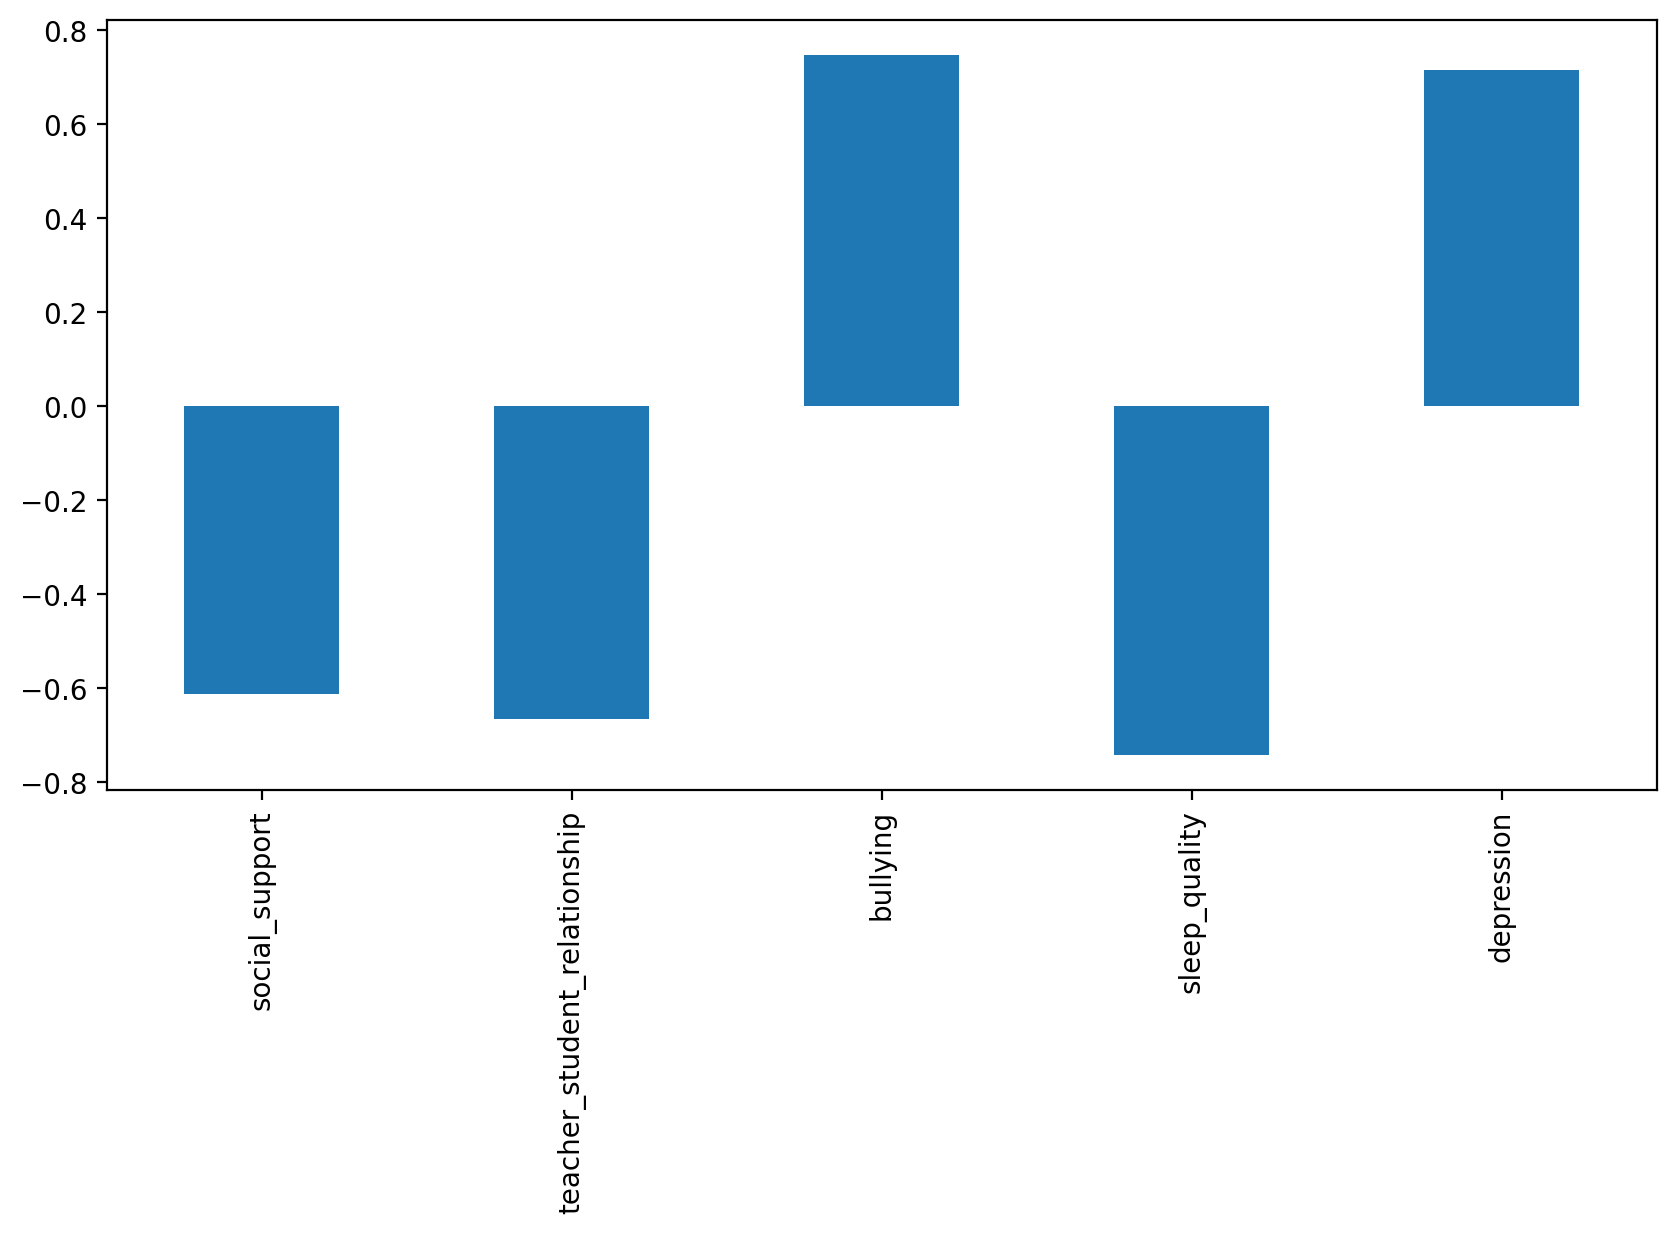

In [94]:
corrmat = subset.corr()
t = corrmat["stress_level"].drop("stress_level")

t.plot(kind='bar',stacked=True, figsize=(10,5));

In [95]:
subset.sample(10)

,social_support,teacher_student_relationship,bullying,sleep_quality,depression,stress_level
405,1,1,0,5,5,0
887,0,2,1,4,16,2
272,1,2,4,1,27,2
499,1,2,4,1,22,2
356,3,4,1,5,6,0
87,1,2,5,1,21,2
415,1,1,5,1,22,2
63,3,3,3,2,10,1
397,3,5,1,4,8,0
325,2,2,3,2,13,1


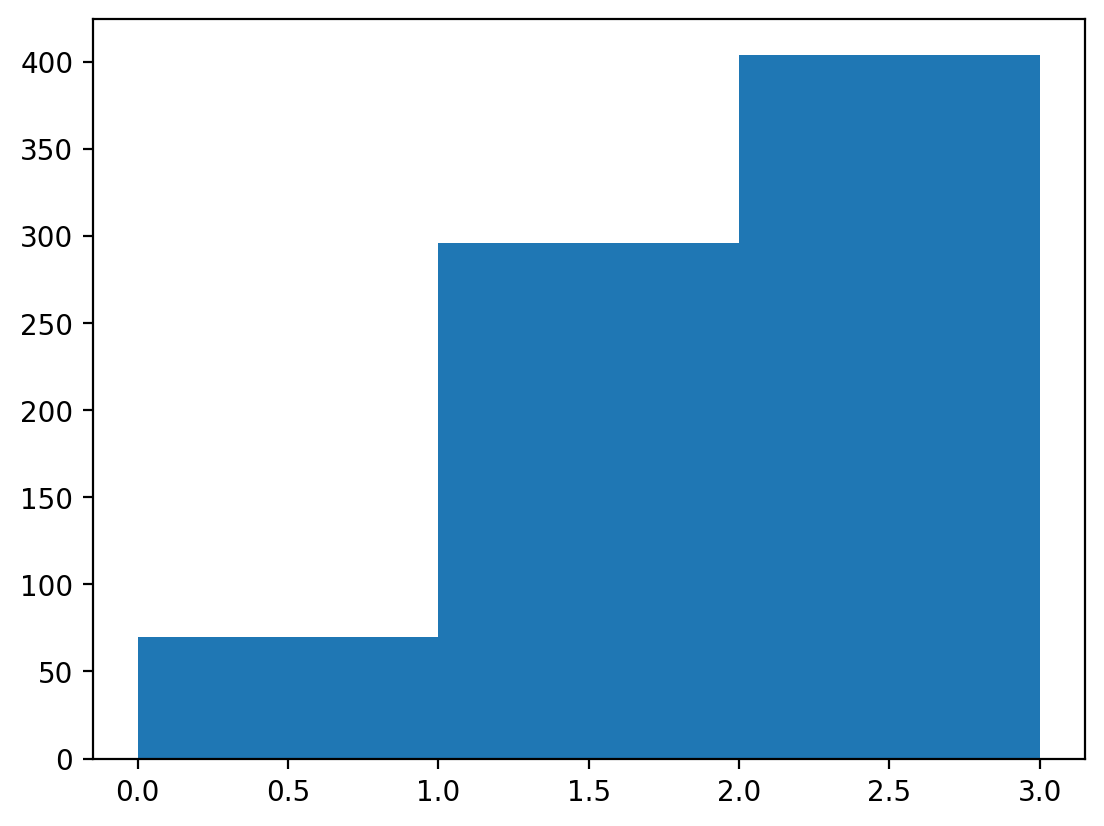

In [96]:
plt.hist(subset["social_support"], bins=3);

In [97]:
#  for social support (lower bad)
bins = [0, 1, 2, 3]
labels = ["bad", "normal", "good"]
subset["social_support"] = pd.cut(subset["social_support"], bins=bins, labels=labels).fillna(labels[0])

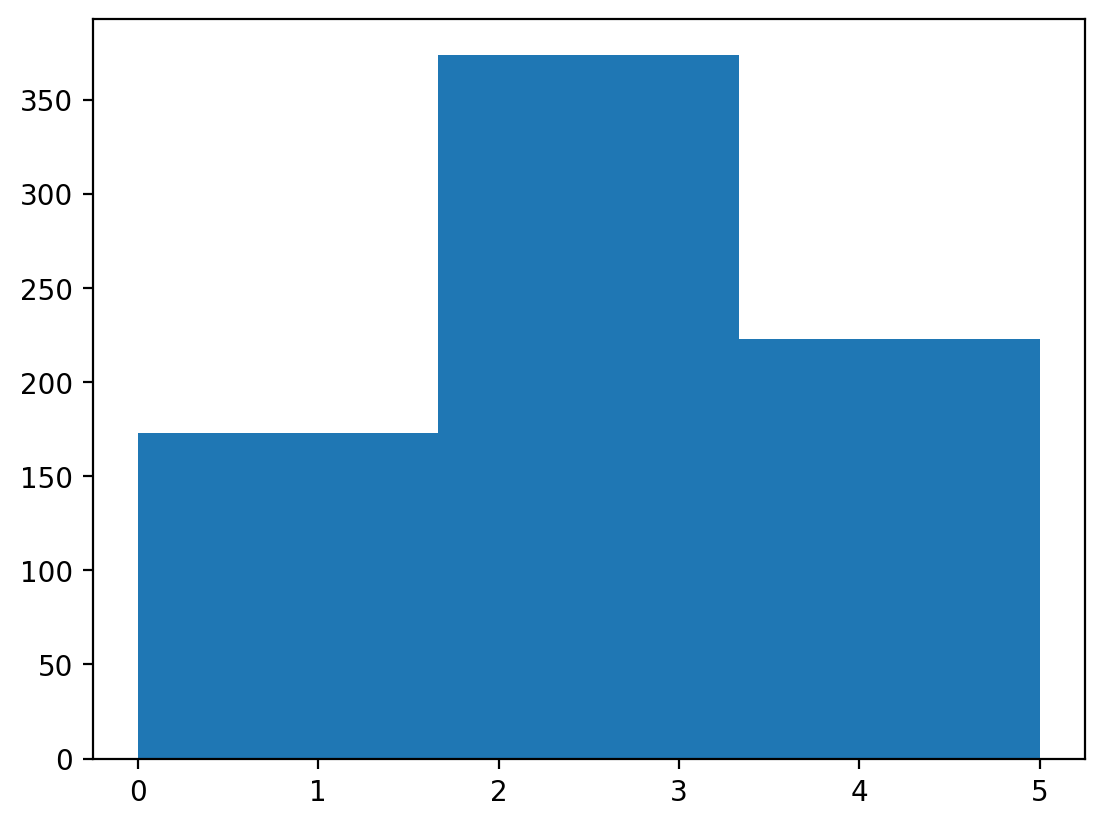

In [98]:
plt.hist(subset["teacher_student_relationship"], bins=3);

In [99]:
#  for teacher_student_relationship (lower bad)
bins = [0, 2, 3, 5]
labels = ["bad", "normal", "good"]
subset["teacher_student_relationship"] = pd.cut(subset["teacher_student_relationship"], bins=bins, labels=labels).fillna(labels[0])

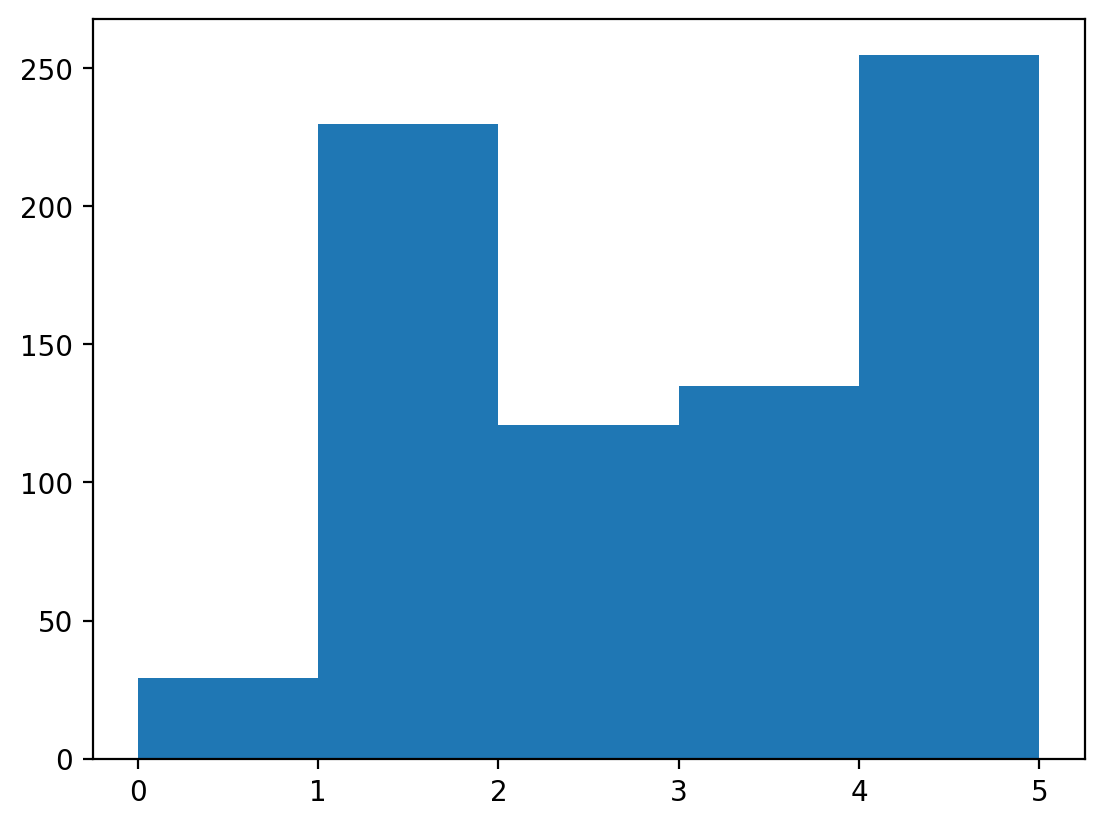

In [100]:
plt.hist(subset["bullying"], bins=5);

In [101]:
#  for bullying (higher bad)
bins = [0, 1, 2, 3, 4, 5]
labels = ["great", "good", "normal", "bad", "worst"]
subset["bullying"] = pd.cut(subset["bullying"], bins=bins, labels=labels).fillna(labels[0])

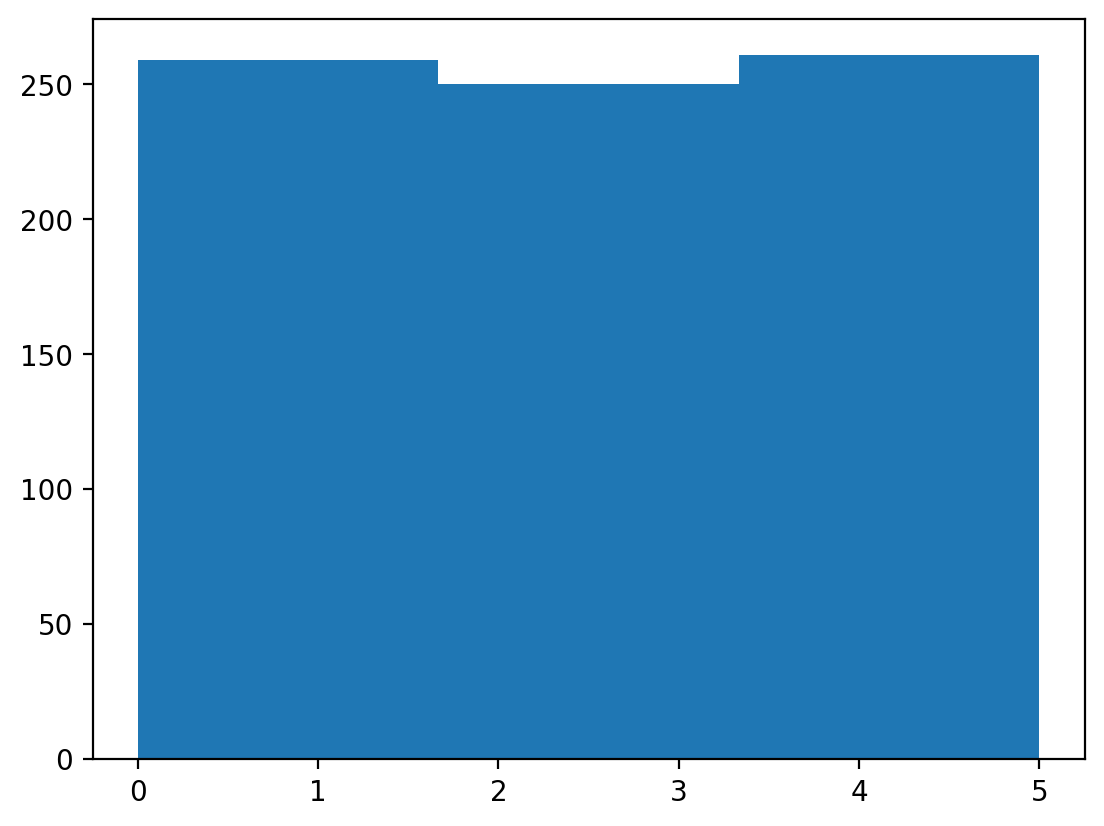

In [102]:
plt.hist(subset["sleep_quality"], bins=3);

In [103]:
#  for sleep_quality (lower bad)
bins = [0, 2, 3, 5]
labels = ["bad", "normal", "good"]
subset["sleep_quality"] = pd.cut(subset["sleep_quality"], bins=bins, labels=labels).fillna(labels[0])

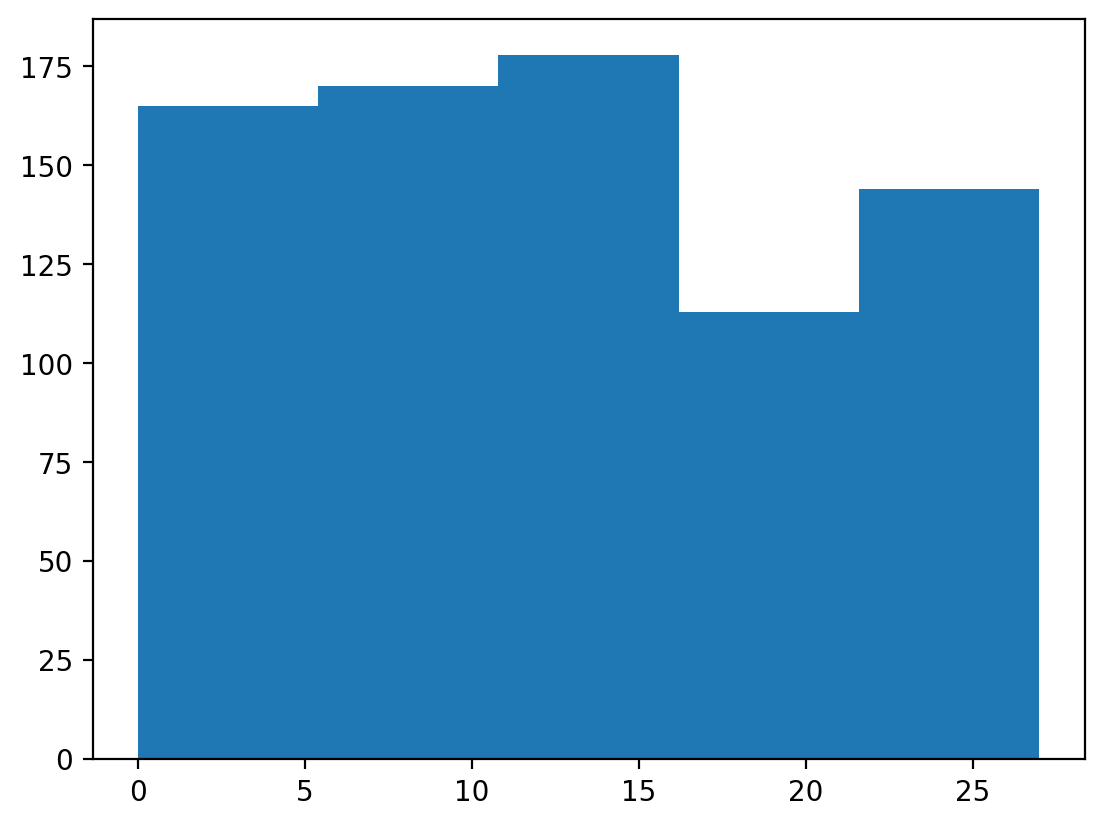

In [104]:
plt.hist(subset["depression"], bins=5);

In [105]:
#  for depression (higher bad)
bins = [0, 5, 10, 15, 20, 27]
labels = ["great", "good", "normal", "bad", "worst"]
subset["depression"] = pd.cut(subset["depression"], bins=bins, labels=labels).fillna(labels[0])

In [106]:
subset

,social_support,teacher_student_relationship,bullying,sleep_quality,depression,stress_level
1042,bad,bad,good,bad,bad,0
914,good,bad,good,bad,normal,1
401,bad,bad,bad,bad,worst,2
16,good,good,great,good,great,0
268,good,good,great,good,great,0
...,...,...,...,...,...,...
145,good,good,great,good,great,0
343,bad,bad,bad,bad,worst,2
192,bad,bad,worst,normal,bad,2
899,good,good,great,good,great,0


In [107]:
def bin_data(data, columns):
    subset = data[columns].copy()
#     labels5 = ["great", "good", "normal", "bad", "worst"]
#     labels3 = ["bad", "normal", "good"]
    labels5 = list(range(5))
    labels3 = list(range(3))
    
    #  for social support (lower bad)
    bins = [0, 1, 2, 3]
    subset["social_support"] = pd.cut(subset["social_support"], bins=bins, labels=labels3).fillna(labels3[0])
    
    #  for teacher_student_relationship (lower bad)
    bins = [0, 2, 3, 5]
    subset["teacher_student_relationship"] = pd.cut(subset["teacher_student_relationship"], bins=bins, labels=labels3).fillna(labels3[0])
    
    #  for sleep_quality (lower bad)
    bins = [0, 2, 3, 5]
    subset["sleep_quality"] = pd.cut(subset["sleep_quality"], bins=bins, labels=labels3).fillna(labels3[0])
    
    
    #  for bullying (higher bad)
    bins = [0, 1, 2, 3, 4, 5]
    subset["bullying"] = pd.cut(subset["bullying"], bins=bins, labels=labels5).fillna(labels5[0])
    
    
    
    #  for depression (higher bad)
    bins = [0, 5, 10, 15, 20, 27]
    subset["depression"] = pd.cut(subset["depression"], bins=bins, labels=labels5).fillna(labels5[0])
    
    return subset
    
    
    

In [108]:
train_binned = bin_data(train, selected_columns)
test_binned = bin_data(test, selected_columns)

In [109]:
train_binned

,social_support,teacher_student_relationship,bullying,sleep_quality,depression,stress_level
1042,0,0,1,0,3,0
914,2,0,1,0,2,1
401,0,0,3,0,4,2
16,2,2,0,2,0,0
268,2,2,0,2,0,0
...,...,...,...,...,...,...
145,2,2,0,2,0,0
343,0,0,3,0,4,2
192,0,0,4,1,3,2
899,2,2,0,2,0,0


In [110]:
train_binned.describe()

,stress_level
count,770.000000
mean,1.009091
std,0.819890
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,2.000000


In [111]:
X_train, y_train, X_test, y_test = divide_data(train_binned, test_binned, column="stress_level")

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9151515151515152


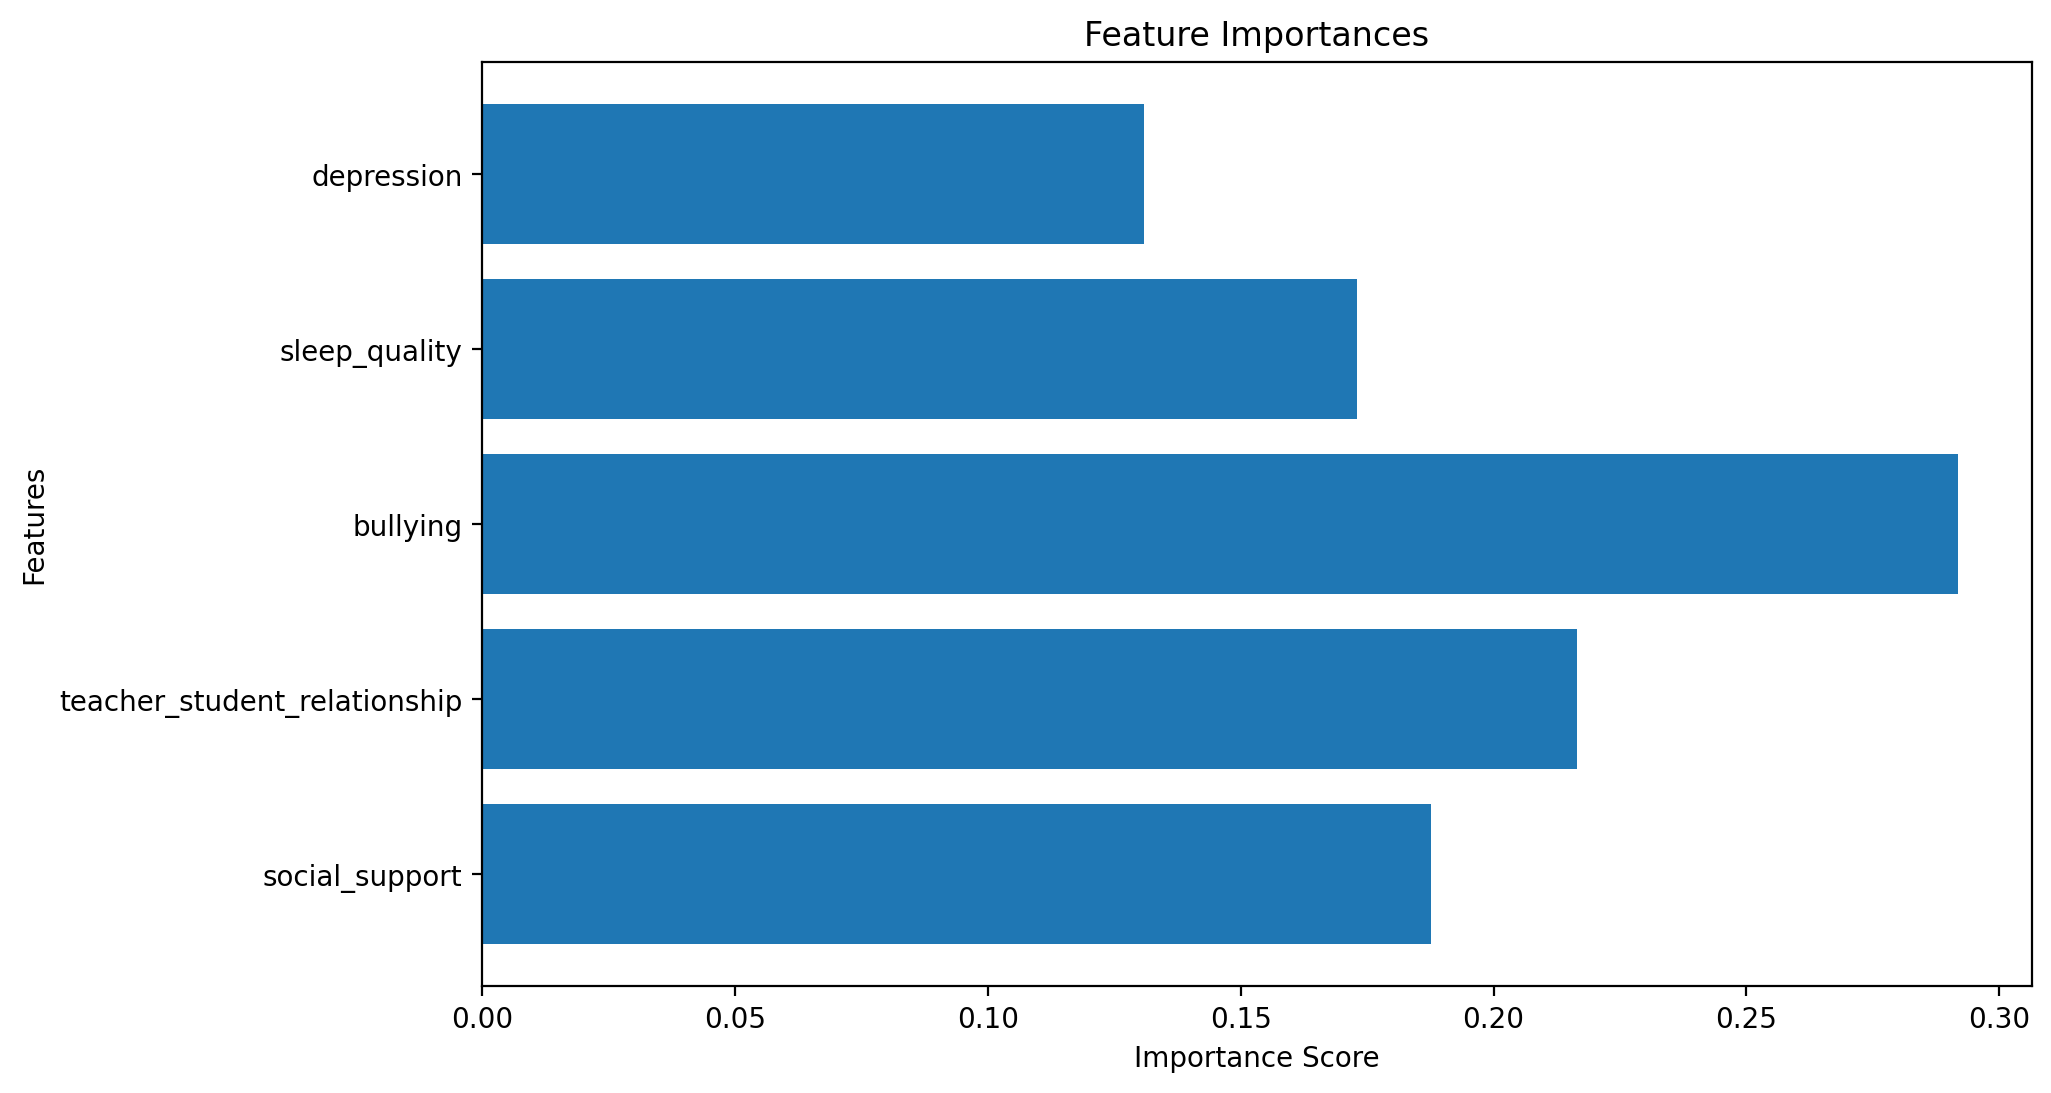

In [112]:
importances = clf.feature_importances_
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(X_train.columns, importances, align="center")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

In [ ]:
clf

In [79]:
col_data = train["social_support"]

col_data

1042    1
914     3
401     1
16      3
268     3
       ..
145     3
343     1
192     0
899     3
418     3
Name: social_support, Length: 770, dtype: int64

In [80]:
train_binned["sleep_quality"].describe()

count     770
unique      3
top         0
freq      386
Name: sleep_quality, dtype: int64

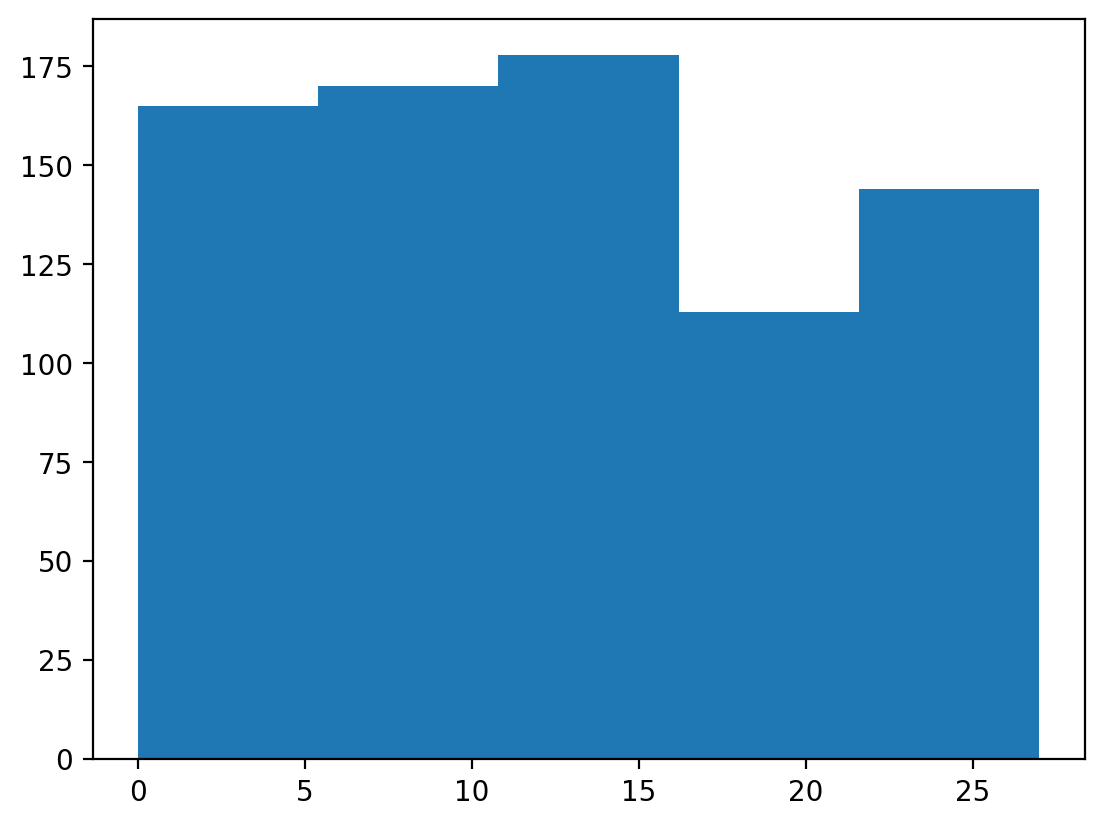

In [81]:
plt.hist(train["depression"], bins=5);

In [82]:
X_train, y_train, X_test, y_test = divide_data(train[selected_columns], test[selected_columns], column="stress_level")

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

KeyError: "['stress_level'] not found in axis"

In [71]:
clf.feature_importances_

array([0.13076038, 0.20672964, 0.20010481, 0.275419  , 0.18698617])

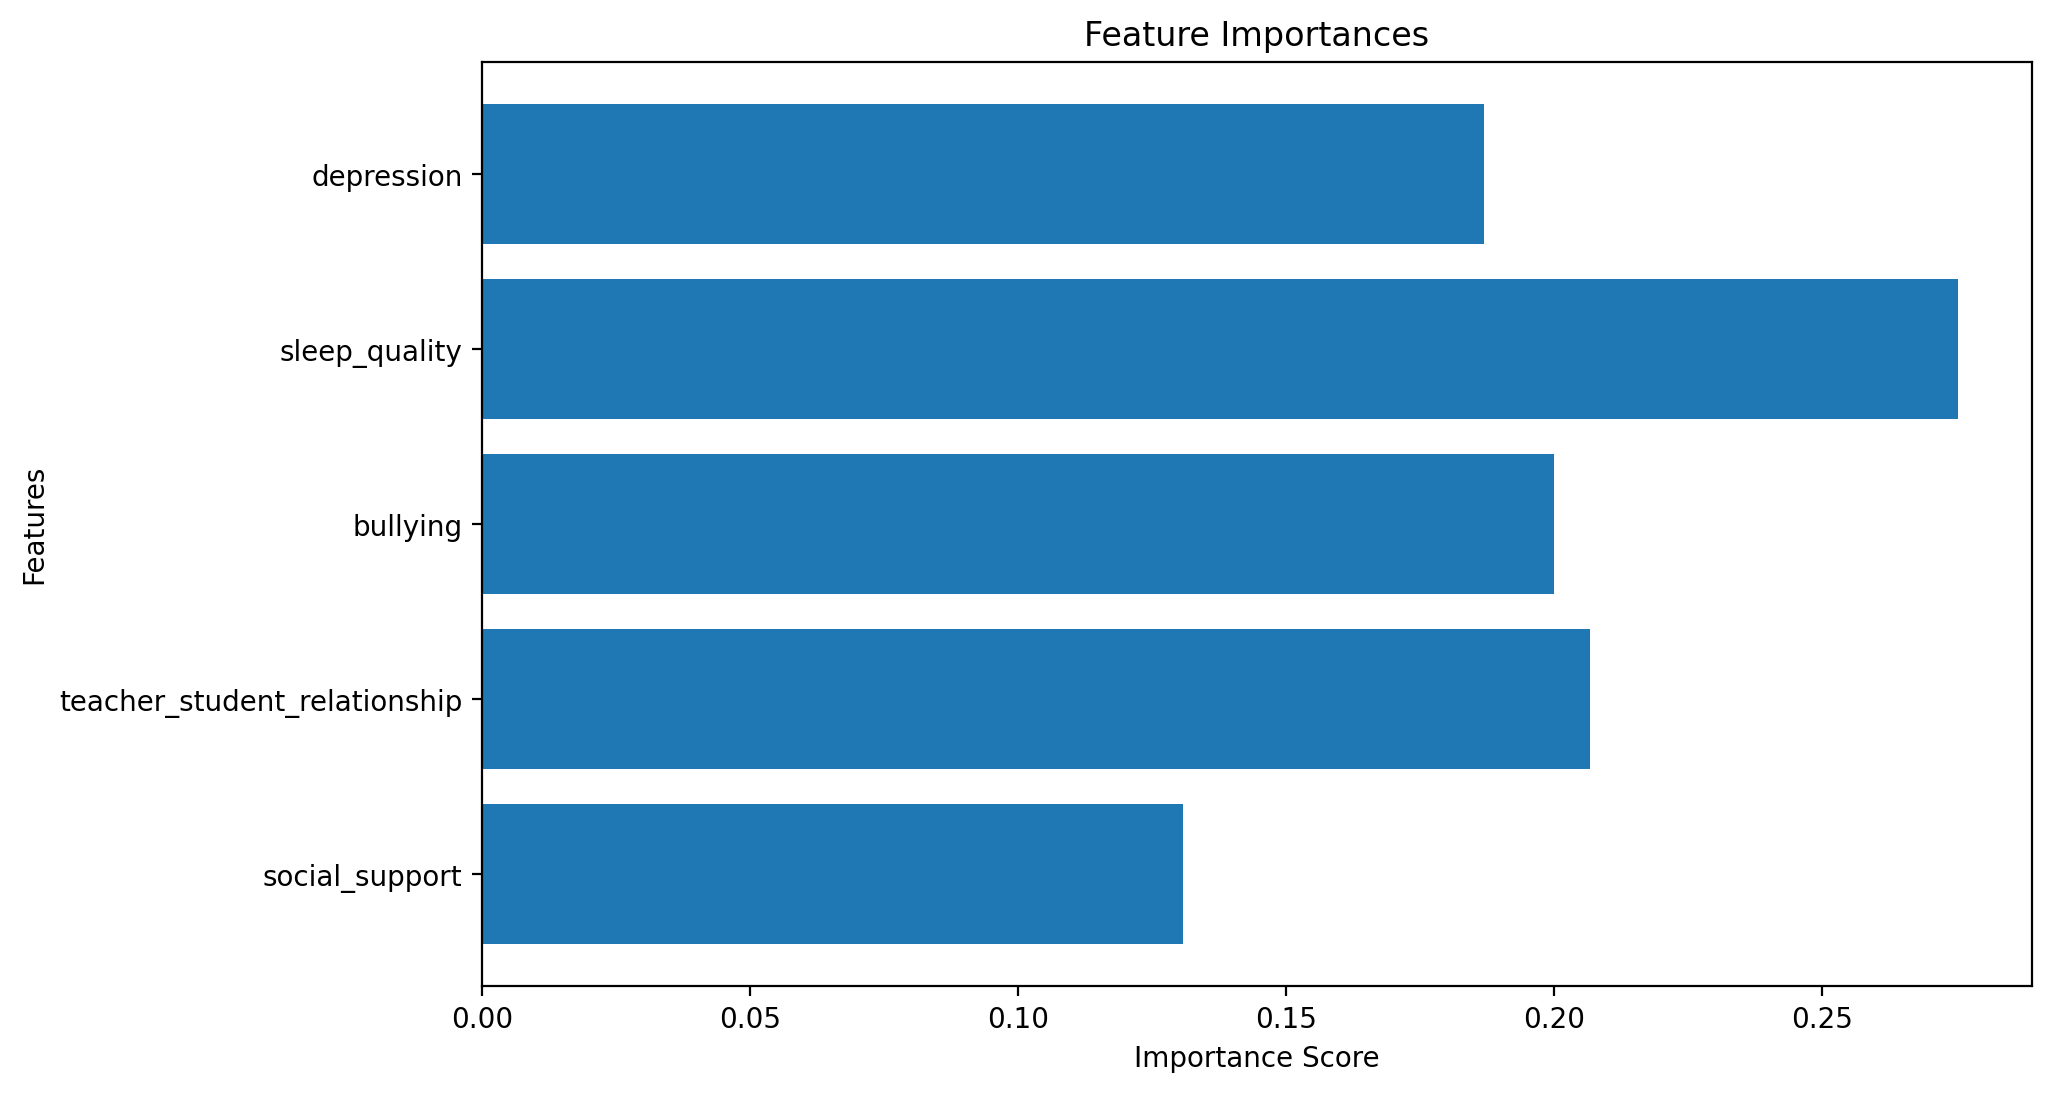

In [72]:
importances = clf.feature_importances_
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(X_train.columns, importances, align="center")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

In [73]:
clf = RandomForestClassifier(max_depth=5, random_state=seed)
X_train, y_train, X_test, y_test = divide_data(train.drop("stress_level", axis=1), test.drop("stress_level", axis=1), column="blood_pressure")

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


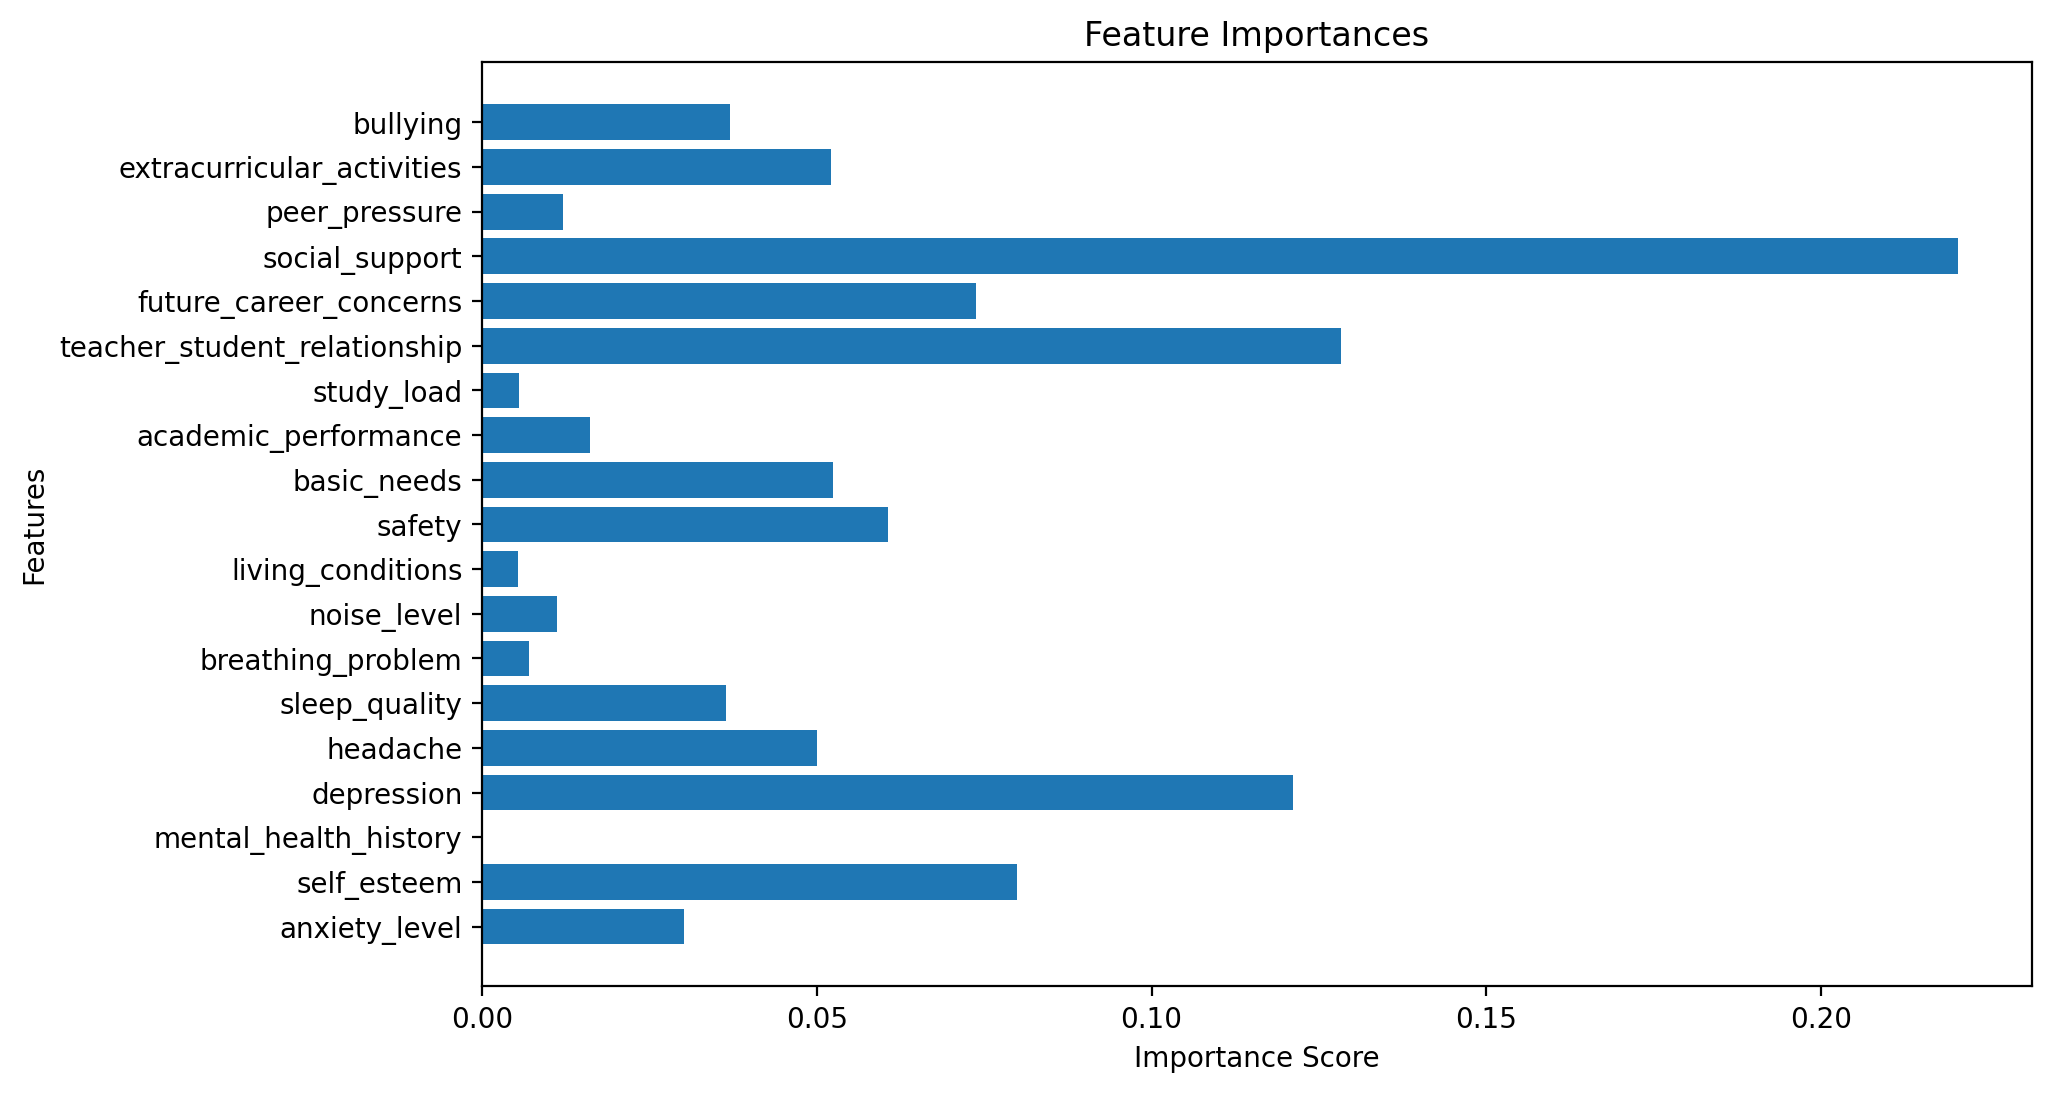

In [74]:
importances = clf.feature_importances_
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(X_train.columns, importances, align="center")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

In [75]:
df.columns

Index(['anxiety_level', 'self_esteem', 'mental_health_history', 'depression',
       'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem',
       'noise_level', 'living_conditions', 'safety', 'basic_needs',
       'academic_performance', 'study_load', 'teacher_student_relationship',
       'future_career_concerns', 'social_support', 'peer_pressure',
       'extracurricular_activities', 'bullying', 'stress_level'],
      dtype='object')

In [76]:
selected_columns = ["social_support", "teacher_student_relationship", "blood_pressure"]

In [77]:
clf = RandomForestClassifier(max_depth=5, random_state=seed)
X_train, y_train, X_test, y_test = divide_data(train[selected_columns], test[selected_columns], column="blood_pressure")

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


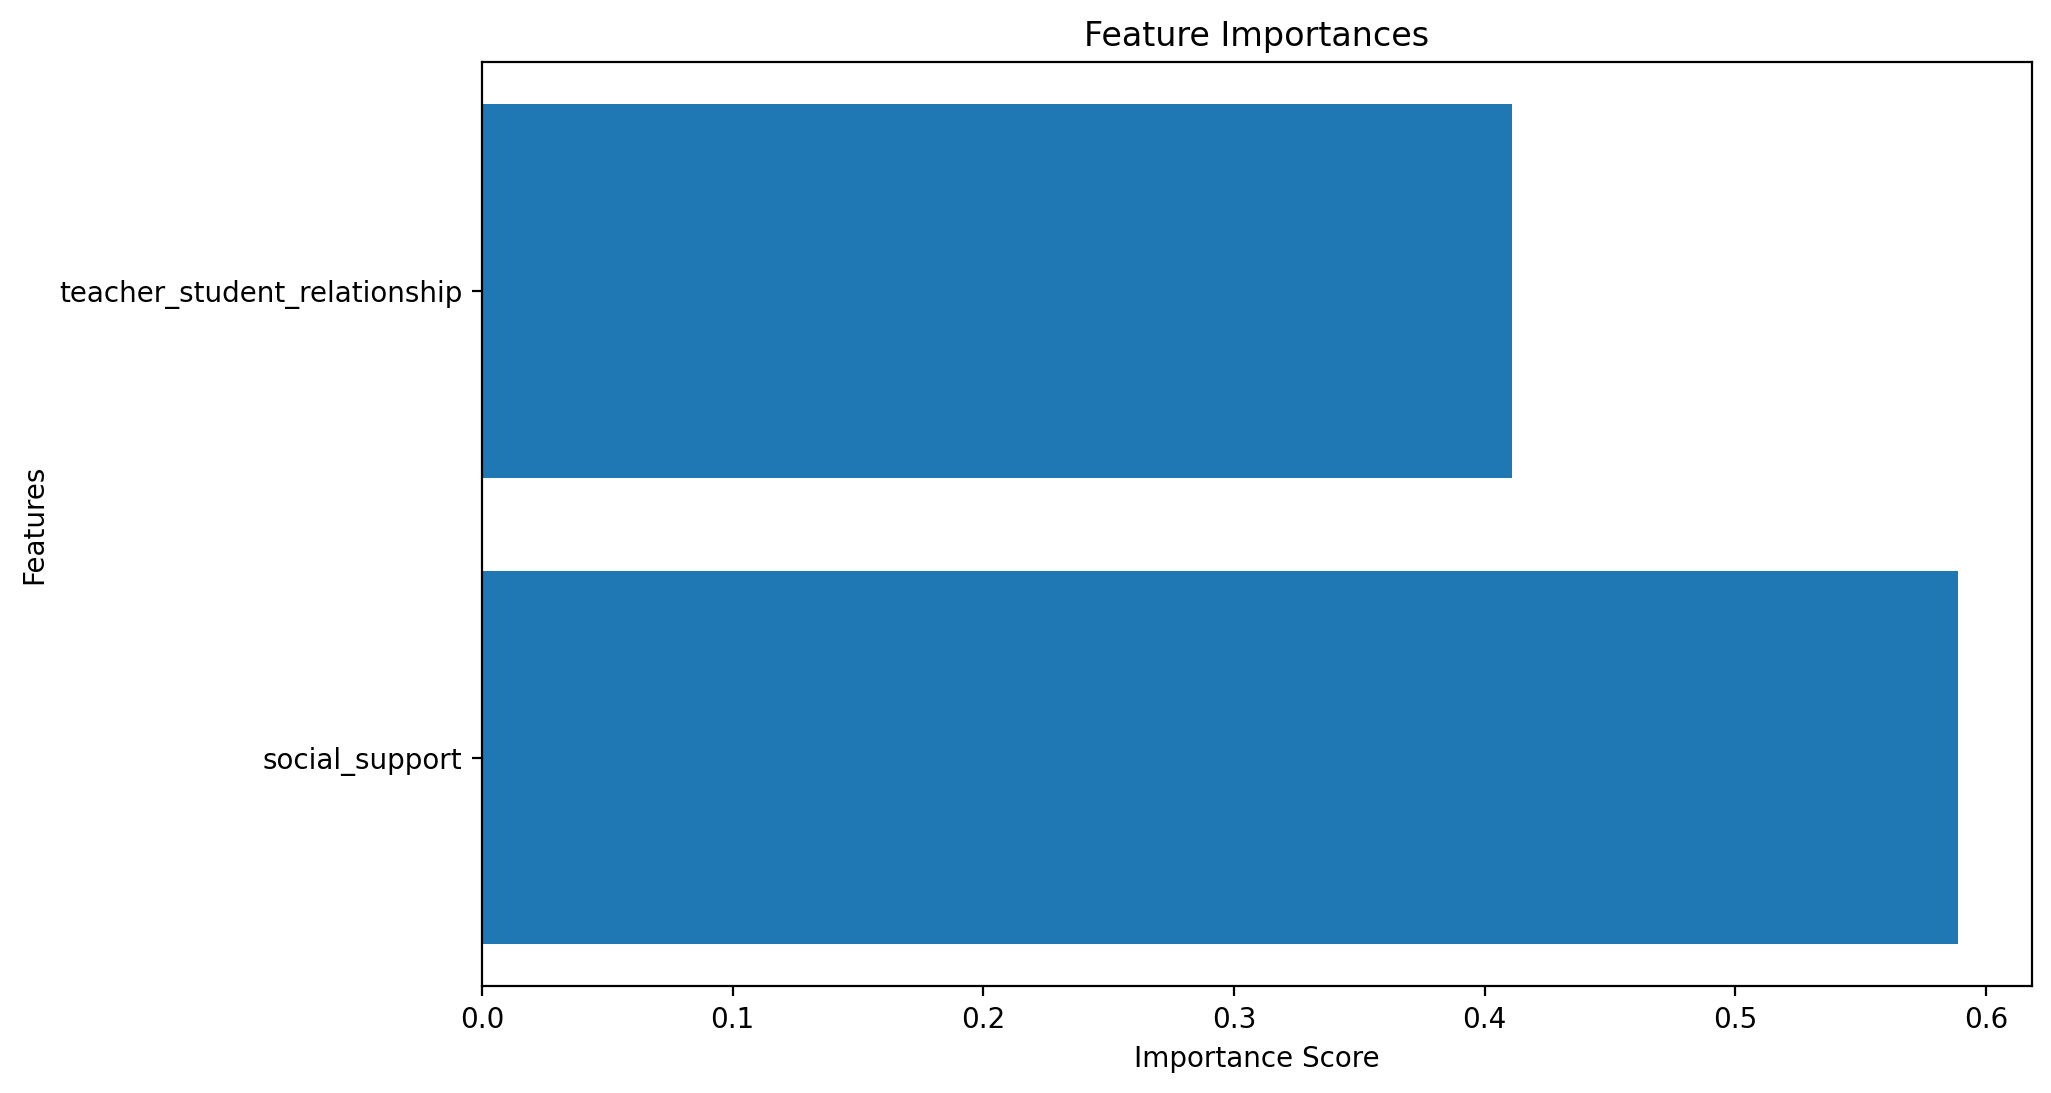

In [78]:
importances = clf.feature_importances_
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(X_train.columns, importances, align="center")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()